<a href="https://colab.research.google.com/github/Arunvinod/Arunvinod/blob/master/Auto%20Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [2]:
! pip install h2o

     |████████████████████████████████| 129.6MB 82kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.2-py2.py3-none-any.whl size=129672980 sha256=d6c143d30ecfbc7b287a1d0717f3f32d1614debdf2e21554d32f96aebfdb5294
  Stored in directory: /root/.cache/pip/wheels/35/f0/d4/2090fb81ef10fd3dedffd1386a8a4d79b882e8e978fbee4e14
Successfully built h2o


In [0]:
import h2o

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppv_400tk
  JVM stdout: /tmp/tmppv_400tk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmppv_400tk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_wltncq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/product_backorders.csv"
# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
df.head()

sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1.11312e+06,0,8,1,6,6,6,0,4,9,12,0,No,1,0.9,0.89,0,No,No,No,Yes,No,Yes
1.11327e+06,0,8,0,2,3,4,1,2,3,3,0,No,0,0.96,0.97,0,No,No,No,Yes,No,Yes
1.11387e+06,20,2,0,45,99,153,16,42,80,111,10,No,0,0.81,0.88,0,No,No,No,Yes,No,Yes
1.11422e+06,0,8,0,9,14,21,5,17,36,43,0,No,0,0.96,0.98,0,No,No,No,Yes,No,Yes
1.11482e+06,0,12,0,31,31,31,7,15,33,47,2,No,3,0.98,0.98,0,No,No,No,Yes,No,Yes
1.11545e+06,55,8,0,216,360,492,30,108,275,340,51,No,0,0,0,0,No,No,Yes,Yes,No,Yes
1.11562e+06,-34,8,0,120,240,240,83,122,144,165,33,No,0,1,0.97,34,No,No,No,Yes,No,Yes
1.11645e+06,4,9,0,43,67,115,5,22,40,58,4,No,0,0.69,0.68,0,No,No,No,Yes,No,Yes
1.11683e+06,2,8,0,4,6,9,1,5,6,9,2,No,0,1,0.95,0,No,No,No,Yes,No,Yes
1.11687e+06,-7,8,0,56,96,112,13,30,56,76,0,No,0,0.97,0.92,7,No,No,No,Yes,No,Yes


In [8]:
print(f'Size of training set: {df.shape[0]} rows and {df.shape[1]} columns')

Size of training set: 19053 rows and 23 columns


In [0]:
splits = df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [0]:
y = "went_on_backorder" 
x = df.columns 
x.remove(y) 
x.remove("sku")

In [0]:
from h2o.automl import H2OAutoML

In [13]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [14]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20200511_074401_model_1,0.945716,0.180341,0.720153,0.177404,0.231002,0.0533617
XGBoost_grid__1_AutoML_20200511_074401_model_2,0.94555,0.177429,0.721682,0.155512,0.229483,0.0526624
StackedEnsemble_AllModels_AutoML_20200511_074401,0.945327,0.18561,0.731707,0.164821,0.229867,0.0528388
StackedEnsemble_BestOfFamily_AutoML_20200511_074401,0.942751,0.190282,0.717664,0.157874,0.231847,0.0537529
XGBoost_3_AutoML_20200511_074401,0.939977,0.189264,0.714398,0.176434,0.233163,0.0543649
XGBoost_2_AutoML_20200511_074401,0.933409,0.217551,0.699523,0.185161,0.241657,0.0583981
XGBoost_grid__1_AutoML_20200511_074401_model_3,0.922165,0.494965,0.652152,0.211481,0.391597,0.153348
GBM_3_AutoML_20200511_074401,0.90278,0.291314,0.58676,0.176844,0.290941,0.0846466
GBM_5_AutoML_20200511_074401,0.896571,0.307286,0.511787,0.177448,0.300616,0.09037
XGBoost_1_AutoML_20200511_074401,0.892771,0.279337,0.641577,0.197702,0.2812,0.0790733


In [0]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

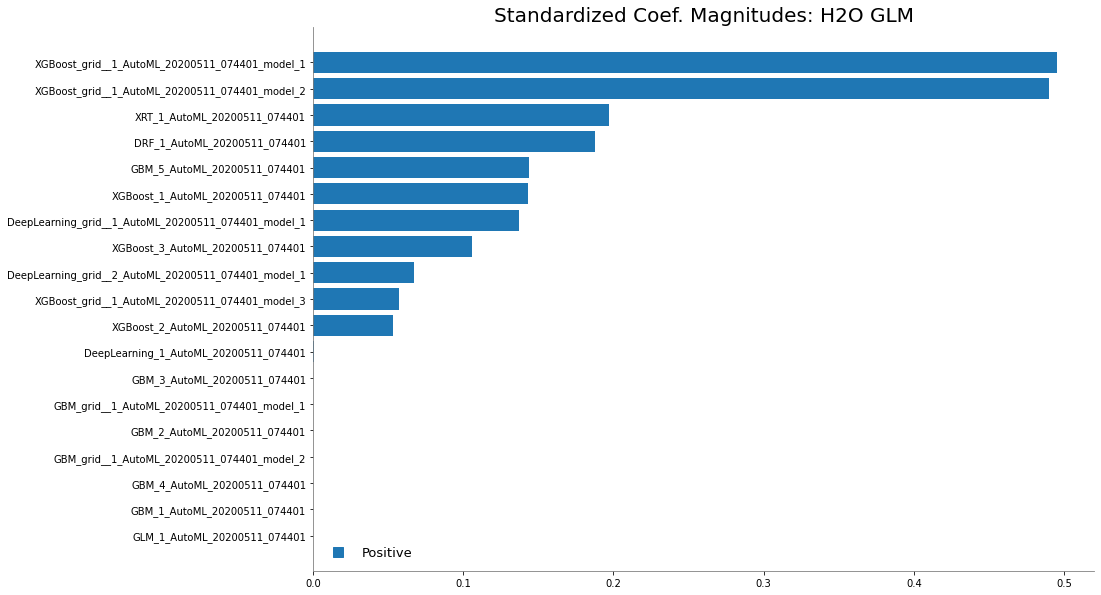

In [16]:
%matplotlib inline
metalearner.std_coef_plot()